# **FTSE/JSE Top 40 Portfolio Optimisation using Monte Carlo Simulations**

Thabang Ndhlovu, May 2022 

## In this notebook, we will try to construct an optimal investment portfolio at random and compare it with the benchmark.
The portfolio will consist of the same holdings as the benchmark but with different asset weights. In this case the benchmark is the FTSE/JSE Top 40 Index (index) which is constructed to represent the performance of South Africa companies, which measure the performance of the major capital and industry segments of the South African market. The index consists of the largest 40 companies ranked by investable market value in the FTSE/JSE All-share Index. Our analysis will be limited to the index and its constituents from 1 May 2017 to 31 May 2022 [read more here.](http://www.ftserussell.com/products/indices/jse)

In [1]:
# import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from quantstats import *

import warnings
warnings.filterwarnings('ignore')

In [2]:
extend_pandas()

# _____

# Data Analysis

In [3]:
# read data
index = pd.read_csv('data/index.csv', index_col=0, parse_dates=True)
stocks = pd.read_csv('data/stocks.csv', index_col=0, parse_dates=True)

### Index

In [4]:
index

,INDEX
Date,
2017-05-02,47138.85
2017-05-03,46917.89
2017-05-04,46747.06
2017-05-05,47009.79
2017-05-08,47076.82
...,...
2022-05-25,61176.02
2022-05-26,63019.00
2022-05-27,63882.81


##### **Risk and return metrics**

In [5]:
def performance_metrics(df):
    '''returns risk and return metrics for the given asset''' 

    metrics = {'Expected Returns':[], 'Cumulative Returns':[], 'Volatility':[], 
               'Sharpe':[], 'Sortino':[], 'Max Drawdown':[], 'VaR at 95%':[]}
    df = pd.concat(df)

    for x in df:
        metrics['Expected Returns'].append(df[x].expected_return(aggregate='A'))
        metrics['Cumulative Returns'].append(df[x].pct_change().comp())
        metrics['Volatility'].append(df[x].volatility())
        metrics['Sharpe'].append(df[x].smart_sharpe())
        metrics['Sortino'].append(df[x].smart_sortino())
        metrics['Max Drawdown'].append(df[x].max_drawdown())
        metrics['VaR at 95%'].append(df[x].pct_change().var())

    return pd.DataFrame(metrics, index=df.columns).round(6)

In [6]:
index_metrics = performance_metrics([index])
index_metrics

,Expected Returns,Cumulative Returns,Volatility,Sharpe,Sortino,Max Drawdown,VaR at 95%
INDEX,0.056171,0.388052,0.201823,0.40129,0.562168,-0.378206,0.000162


In [7]:
stats.drawdown_details(index.log_returns())

INDEX                                                            
        start      valley         end  days max drawdown 99% max drawdown
0  2017-05-03  2020-03-12  2020-03-25  1057   -10.450425        -3.078253
1  2020-03-26  2020-03-27  2022-05-31   796    -4.829019        -2.888602

### Constituents

In [8]:
stocks

,ABGJ,AGLJ,AMSJ,ANGJ,ANHJ,APNJ,BIDJ,BHPJ,BTIJ,BVTJ,...,NPNJn,PRXJn,RNIJ,S32J,SBKJ,SHPJ,SLMJ,SOLJ,VODJ,SSWJ
Date,,,,,,,,,,,,,,,,,,,,,
2017-05-02,14799.0,18446.0,32997.0,15111.0,150825.0,27949.0,28793.0,19087.0,90200.0,16479.0,...,247920.0,116800.0,31100.0,2682.0,15033.0,21101.0,7125.0,41633.0,15101.0,1629.0
2017-05-03,14759.0,17935.0,31100.0,15476.0,150787.0,27999.0,28316.0,18728.0,90045.0,16683.0,...,248673.0,116800.0,31000.0,2633.0,14750.0,20750.0,7057.0,41550.0,15232.0,1649.0
2017-05-04,14500.0,17394.0,31433.0,14943.0,161006.0,27600.0,28200.0,18566.0,91747.0,16510.0,...,248046.0,116800.0,31600.0,2608.0,14699.0,20500.0,6950.0,40800.0,15181.0,1615.0
2017-05-05,14440.0,17938.0,31450.0,15050.0,162064.0,27614.0,28900.0,18921.0,92476.0,16720.0,...,252300.0,116800.0,32220.0,2679.0,14603.0,20300.0,6947.0,40979.0,15200.0,1625.0
2017-05-08,14700.0,17701.0,30568.0,14770.0,161300.0,27795.0,29300.0,18843.0,93100.0,16449.0,...,252706.0,116800.0,32100.0,2673.0,14700.0,19900.0,6975.0,40500.0,15245.0,1598.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-05-25,16221.0,73291.0,157657.0,27396.0,87969.0,15447.0,31739.0,50000.0,70650.0,19446.0,...,152688.0,72644.0,31273.0,5219.0,15782.0,20280.0,6363.0,38459.0,14410.0,4722.0
2022-05-26,16809.0,74269.0,168810.0,27840.0,89351.0,15928.0,32879.0,50000.0,70860.0,20233.0,...,160019.0,76106.0,31456.0,5300.0,16255.0,20800.0,6546.0,40500.0,14370.0,4998.0
2022-05-27,17297.0,74926.0,167258.0,27690.0,87779.0,15925.0,33398.0,50000.0,69837.0,20950.0,...,158637.0,75692.0,31941.0,5428.0,16820.0,21161.0,6643.0,40394.0,14492.0,5041.0


##### **Risk and return metrics**

In [9]:
stocks_metrics = performance_metrics([stocks])
stocks_metrics.sort_values('Sharpe', ascending=False)

,Expected Returns,Cumulative Returns,Volatility,Sharpe,Sortino,Max Drawdown,VaR at 95%
AGLJ,0.266705,3.130977,0.364392,0.924585,1.344043,-0.503986,0.000527
AMSJ,0.315925,4.192624,0.487115,0.904258,1.326735,-0.682687,0.000942
IMPJ,0.307793,4.003039,0.595816,0.818828,1.221858,-0.675249,0.001410
BHPJ,0.174101,1.619584,0.293091,0.772732,1.119988,-0.439854,0.000341
NHMJ,0.230757,2.475629,0.485718,0.735843,1.086021,-0.630426,0.000937
GFIJ,0.235168,2.551044,0.540348,0.731607,1.072981,-0.528755,0.001160
KIOJ,0.228183,2.432247,0.484720,0.704008,1.043297,-0.569749,0.000933
CPIJ,0.194548,1.905506,0.403604,0.695467,1.055405,-0.542560,0.000647
SSWJ,0.209862,2.136280,0.601684,0.655427,0.985883,-0.665723,0.001438
CLSJ,0.145591,1.260356,0.306680,0.628723,0.947080,-0.275183,0.000374


In [10]:
stocks_metrics[['Expected Returns','Volatility','Sharpe']].describe().T

,count,mean,std,min,25%,50%,75%,max
Expected Returns,40.0,0.065379,0.114184,-0.093849,-0.006088,0.032958,0.137199,0.315925
Volatility,40.0,0.389329,0.099961,0.256427,0.308384,0.375282,0.424840,0.685654
Sharpe,40.0,0.337837,0.304438,-0.166244,0.116980,0.301741,0.578912,0.924585


From the tables above, all index consitutes are more volatile than the index.

### **Visualisation**

In [11]:
plt.rcParams['figure.dpi'] = 140
plt.rcParams['axes.titleweight'] = 'bold'
plt.rcParams['axes.labelweight'] = 'bold'

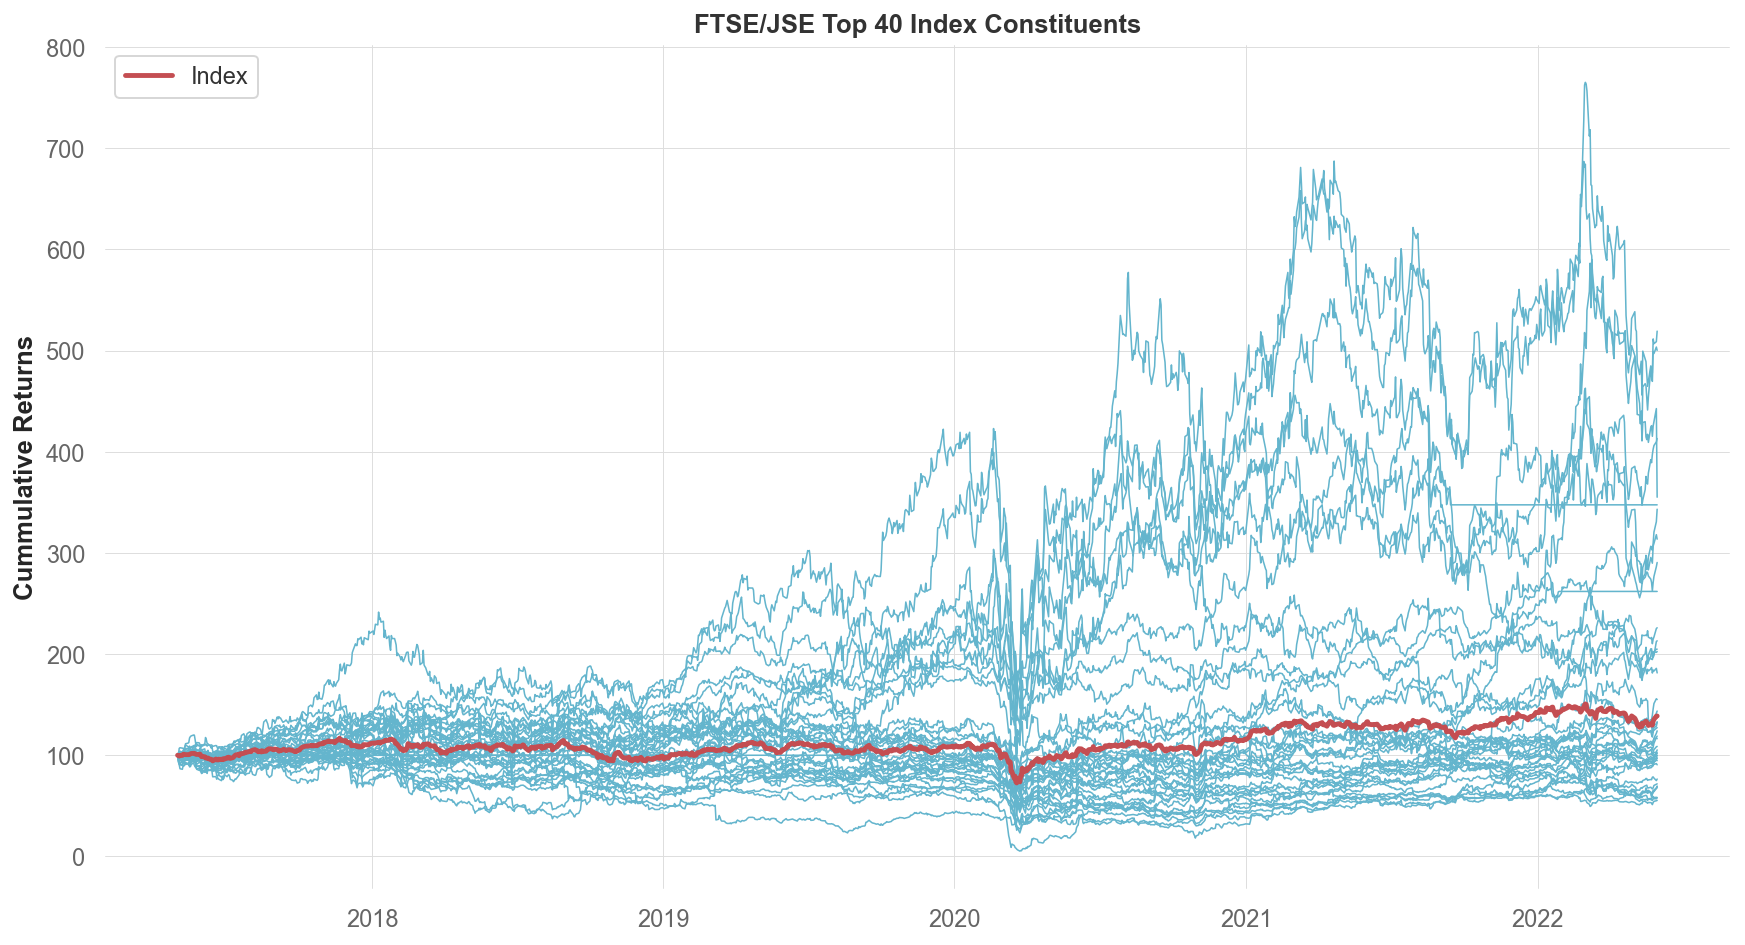

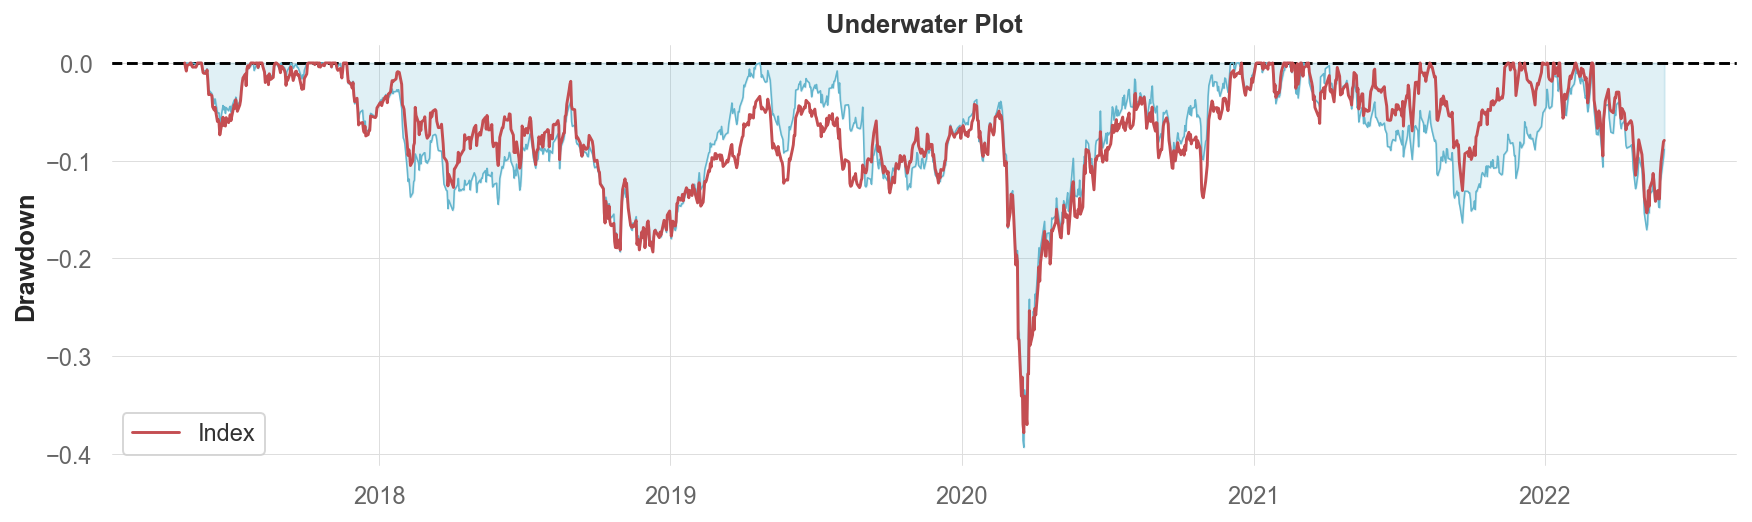

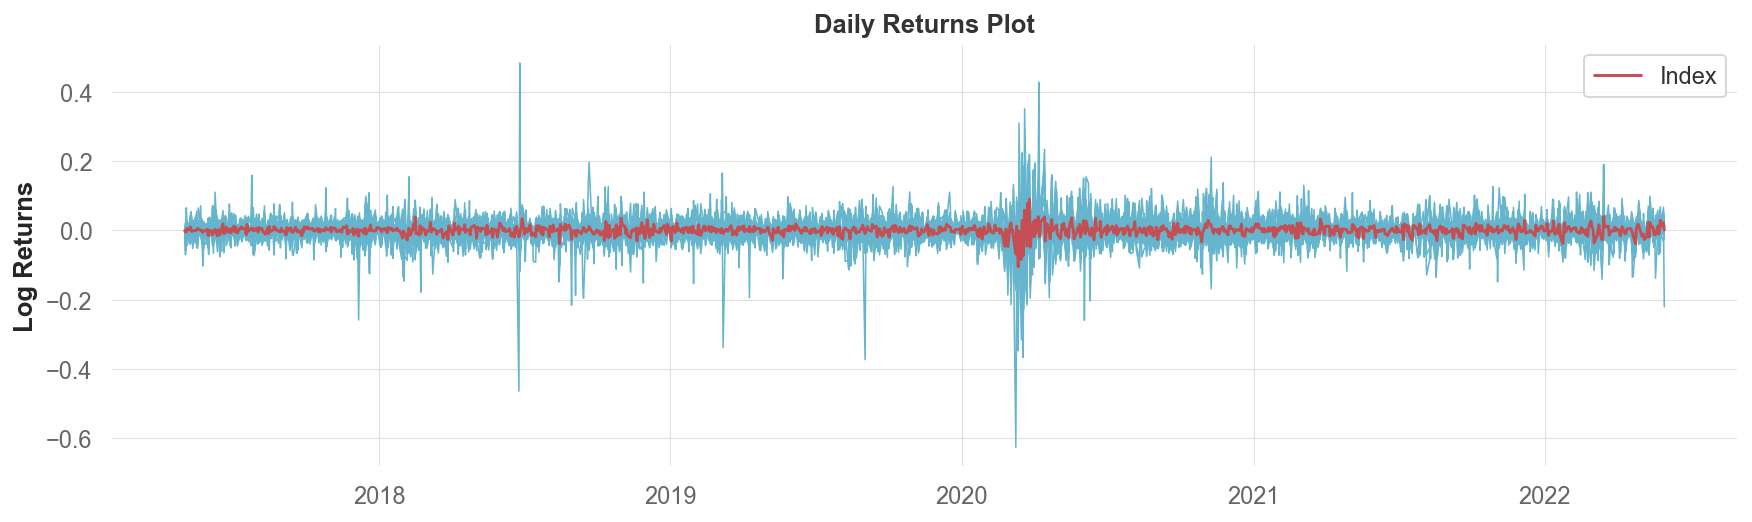

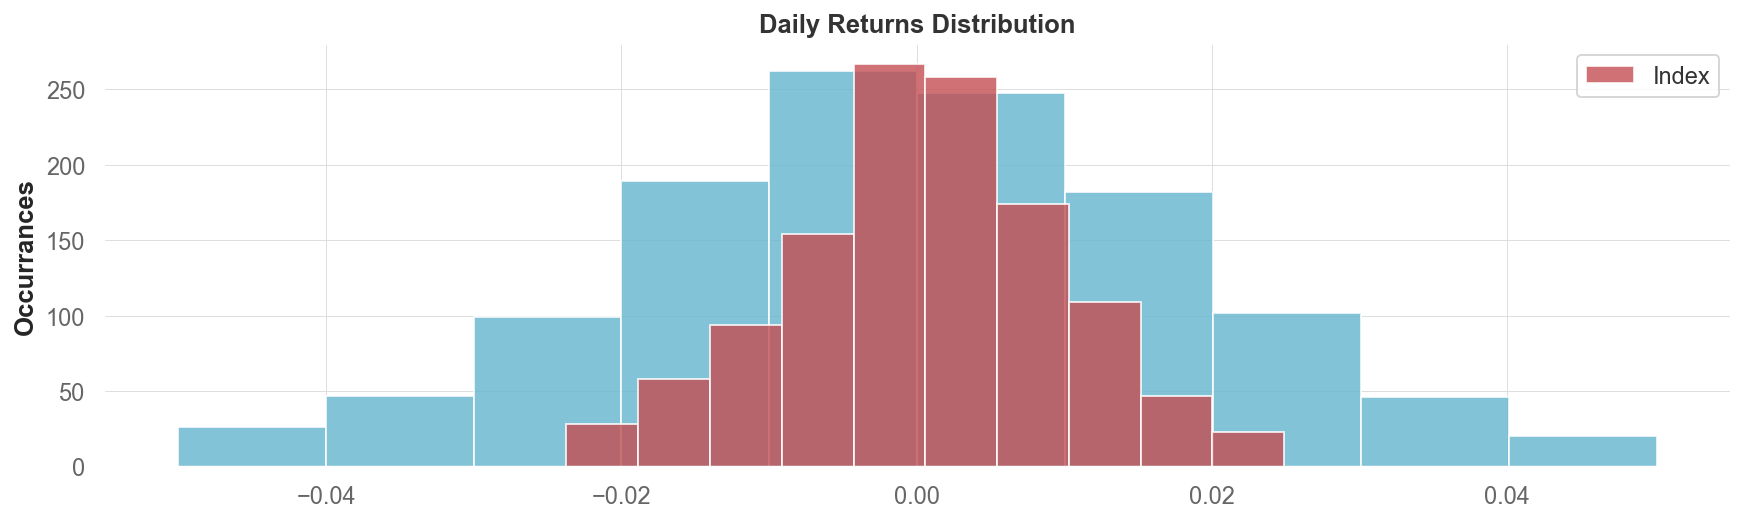

In [12]:
# line plot
plt.figure(figsize=(15, 8))
plt.title('FTSE/JSE Top 40 Index Constituents')
plt.plot(stocks.rebase(), c='c', lw=0.8)
plt.plot(index.rebase(), label='Index', c='r', lw=2.5)
plt.ylabel('Cummulative Returns'), plt.legend()

# underwater plot
plt.figure(figsize=(15, 4))
plt.title('Underwater Plot')
plt.axhline(0, color='black', ls='--')
plt.plot(stocks.sum(axis=1).to_drawdown_series(), c='c', lw=0.8)
plt.plot(index.to_drawdown_series(), label='Index', c='r')
plt.fill_between(stocks.sum(axis=1).to_drawdown_series().index, 
                 stocks.sum(axis=1).to_drawdown_series(), alpha=0.2, 
                 color='c'), plt.ylabel('Drawdown'), plt.legend()

# returns plot
plt.figure(figsize=(15, 4))
plt.title('Daily Returns Plot')
plt.plot(stocks.log_returns(), c='c', lw=0.8)
plt.plot(index.log_returns(), label='Index', c='r')
plt.ylabel('Log Returns'), plt.legend()

# histogram
plt.figure(figsize=(15, 4))
plt.title('Daily Returns Distribution')
plt.hist(stats.distribution(stocks)['Daily']['values'], alpha=0.8, color='c')
plt.hist(stats.distribution(index)['Daily']['values'], alpha=0.8, color='r', 
         label='Index'), plt.ylabel('Occurrances'), plt.legend();

# _____

# Monte Carlo Portfolio Optimisation 

Harry Markowitz, the Nobel Prize winner, pioneered portfolio optimisation. His theory established the mean-variance framework, which is a paradigm for maximising Expected Returns at a given level of risk . Willam Sharpe, a fellow Nobel Prize winner, developed his ideas further into the modern portfolio theory (MPT). The ideal portfolio strikes a balance between Expected Returns and risk. In this notebook we will maximise expected return subject to an upper bound on the risk, or to minimise risk suject to a lower bound the expected return. One key concept that we will demonstrate is reduction of risk by diversifying the portfolio.

Using Monte Carlo simulation, we will try to identify the ideal portolio at random.

In [13]:
def monte_carlo(df=stocks, simulations=1000):
    
    np.random.seed(0) 
    
    # create empty list for weights and metrics
    simulation_weights = []
    simulation_metrics = {'returns':[], 'volatility':[], 'sharpe':[]}

    for portfolio in range(simulations):
        
        # generate random weights and rebalance them to sum to 1
        weights = np.random.random(len(df.columns))
        weights = weights/weights.sum()

        # calculate portfolio return, volatility and sharpe ratio
        returns = df.log_returns()
        portfolio_returns = returns.mean() * 252 @ weights 
        portfolio_vol = np.sqrt(weights @ returns.cov() * 252 @ weights)
        portfolio_sharpe = portfolio_returns / portfolio_vol

        # store results
        simulation_weights.append(weights)
        simulation_metrics['returns'].append(portfolio_returns)
        simulation_metrics['volatility'].append(portfolio_vol)
        simulation_metrics['sharpe'].append(portfolio_sharpe)
        
        # return dataframe for weights and metrics
    return pd.DataFrame(simulation_weights, columns=df.columns), pd.DataFrame(simulation_metrics)

In [14]:
simulated_weights, simulated_metrics = monte_carlo(stocks, simulations=200)

In [15]:
simulated_metrics.describe().T

,count,mean,std,min,25%,50%,75%,max
returns,200.0,0.068627,0.012113,0.033829,0.060382,0.068825,0.077362,0.101726
volatility,200.0,0.203680,0.006718,0.185156,0.199266,0.202674,0.207776,0.220243
sharpe,200.0,0.336364,0.054781,0.171480,0.302955,0.340512,0.375421,0.474656


Looking at the table above, on avarage simulated portfolios yield postitive returns with an maximum expected return of 10.1726% p.a and an average expected return of 6.68627% p.a. While the volatility range is 3.5087%.

The distribution of portfolio returns is right skewed (compared to Index returns). This is a good sign as it indicates there are 'good' portfolios in our simulations.

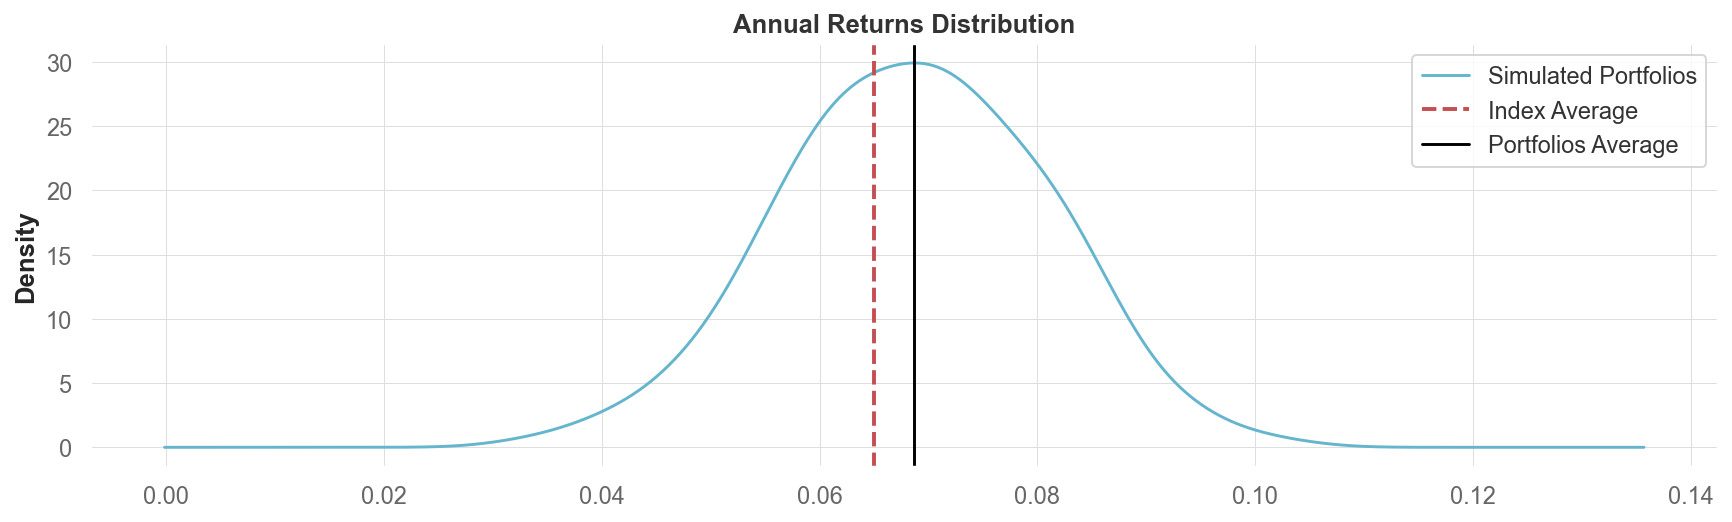

In [16]:
# kde plot
simulated_metrics['returns'].plot.kde(figsize=(15, 4), title='Annual Returns Distribution', 
                                      label='Simulated Portfolios', color='c')
plt.axvline(index.log_returns().mean()[0] * 252, lw=2, ls='--', color='r',label='Index Average')
plt.axvline(simulated_metrics['returns'].mean(), color='black', label='Portfolios Average') 
plt.legend();

### Portfolio Analysis

In [17]:
def get_simulated_portfolio(weights=simulated_weights, stocks=stocks):
    '''returns all simulated portfolios'''
    
    for portfolio in range(len(weights)):
        portfolio, index = [], []
        
        for x in range(len(weights)):
            portfolio_x = stocks @ weights.values[x]
            portfolio.append(portfolio_x), index.append(f'Portfolio {x}')

    return pd.DataFrame(portfolio, index=index).T

In [18]:
simulated_portfolios = get_simulated_portfolio()

In [19]:
simulated_portfolios

,Portfolio 0,Portfolio 1,Portfolio 2,Portfolio 3,Portfolio 4,Portfolio 5,Portfolio 6,Portfolio 7,Portfolio 8,Portfolio 9,...,Portfolio 190,Portfolio 191,Portfolio 192,Portfolio 193,Portfolio 194,Portfolio 195,Portfolio 196,Portfolio 197,Portfolio 198,Portfolio 199
Date,,,,,,,,,,,,,,,,,,,,,
2017-05-02,28356.202856,43517.311334,30915.570509,26189.192237,30991.494444,23407.397247,36023.691365,33194.670897,26872.182767,28942.175298,...,30118.083382,25189.494164,25346.425221,30355.961620,29505.131176,30626.968725,27990.207144,22588.660850,34788.338921,29632.094781
2017-05-03,28171.978883,43340.215042,30807.827030,25981.352471,30822.224329,23223.491688,35881.329065,32963.824431,26749.158928,28714.705338,...,29946.839839,24905.677396,25153.758767,30185.533424,29282.048114,30509.979020,27842.548451,22477.696243,34643.489562,29483.478592
2017-05-04,28331.544597,43769.466749,31005.061717,26088.648402,31293.658971,23195.273559,36092.881023,33088.501304,26798.666975,29097.681641,...,30045.814958,24873.771545,25375.295334,30140.392541,29383.949671,30527.663223,28011.932509,22503.280672,34855.470690,29687.371685
2017-05-05,28446.424254,44119.166995,31168.229331,26133.824677,31474.298092,23302.438921,36289.584085,33330.922770,27001.949675,29204.806366,...,30287.808234,24952.433083,25472.707667,30338.838019,29546.889055,30747.860724,28178.567694,22568.955706,35088.173631,29872.720325
2017-05-08,28419.636755,44070.765222,31146.342661,26083.705120,31410.861134,23290.600285,36258.650397,33305.142660,27013.476895,29144.852040,...,30262.035195,24876.642217,25418.931727,30325.441631,29501.209055,30748.751526,28182.389605,22591.918980,35078.490309,29862.357354
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-05-25,35651.590315,50493.221920,30290.666608,32528.062962,34542.938937,33276.381492,38198.757501,43889.826313,27246.231972,37727.326102,...,32008.976353,40308.819247,35873.403712,39083.251079,39818.462927,32138.123149,31299.449251,23154.213052,33847.710624,33650.897573
2022-05-26,36725.133052,52290.031751,31176.385733,33683.979872,35650.172044,34296.305989,39600.405576,45353.933098,27987.110383,38791.608842,...,33181.668092,41713.941615,36898.462925,40445.835366,41164.791484,33096.458353,32172.269112,23699.366752,34854.856889,34613.866291
2022-05-27,36928.250519,52519.498389,31336.222745,33806.851600,35660.431859,34647.936329,39789.226955,45666.032972,28157.879593,39060.393669,...,33321.948710,42085.967007,37213.886527,40750.901204,41410.043151,33313.276996,32386.342650,23935.191919,34966.774468,34912.727968


In [20]:
portfols_metrics = performance_metrics([simulated_portfolios])
portfols_metrics

,Expected Returns,Cumulative Returns,Volatility,Sharpe,Sortino,Max Drawdown,VaR at 95%
Portfolio 0,0.050130,0.341094,0.188417,0.397148,0.549907,-0.375589,0.000141
Portfolio 1,0.038039,0.251071,0.226115,0.306981,0.418586,-0.403865,0.000203
Portfolio 2,0.007162,0.043750,0.188789,0.138533,0.187733,-0.382720,0.000142
Portfolio 3,0.048393,0.327839,0.199389,0.380007,0.528410,-0.394995,0.000158
Portfolio 4,0.027908,0.179578,0.202126,0.258701,0.354306,-0.426132,0.000162
...,...,...,...,...,...,...,...
Portfolio 195,0.020555,0.129844,0.217365,0.220350,0.297624,-0.402020,0.000188
Portfolio 196,0.029220,0.188639,0.191422,0.271358,0.369440,-0.401701,0.000146
Portfolio 197,0.013730,0.085257,0.172189,0.175516,0.239269,-0.340521,0.000118
Portfolio 198,0.006175,0.037628,0.201642,0.136369,0.184010,-0.441574,0.000161


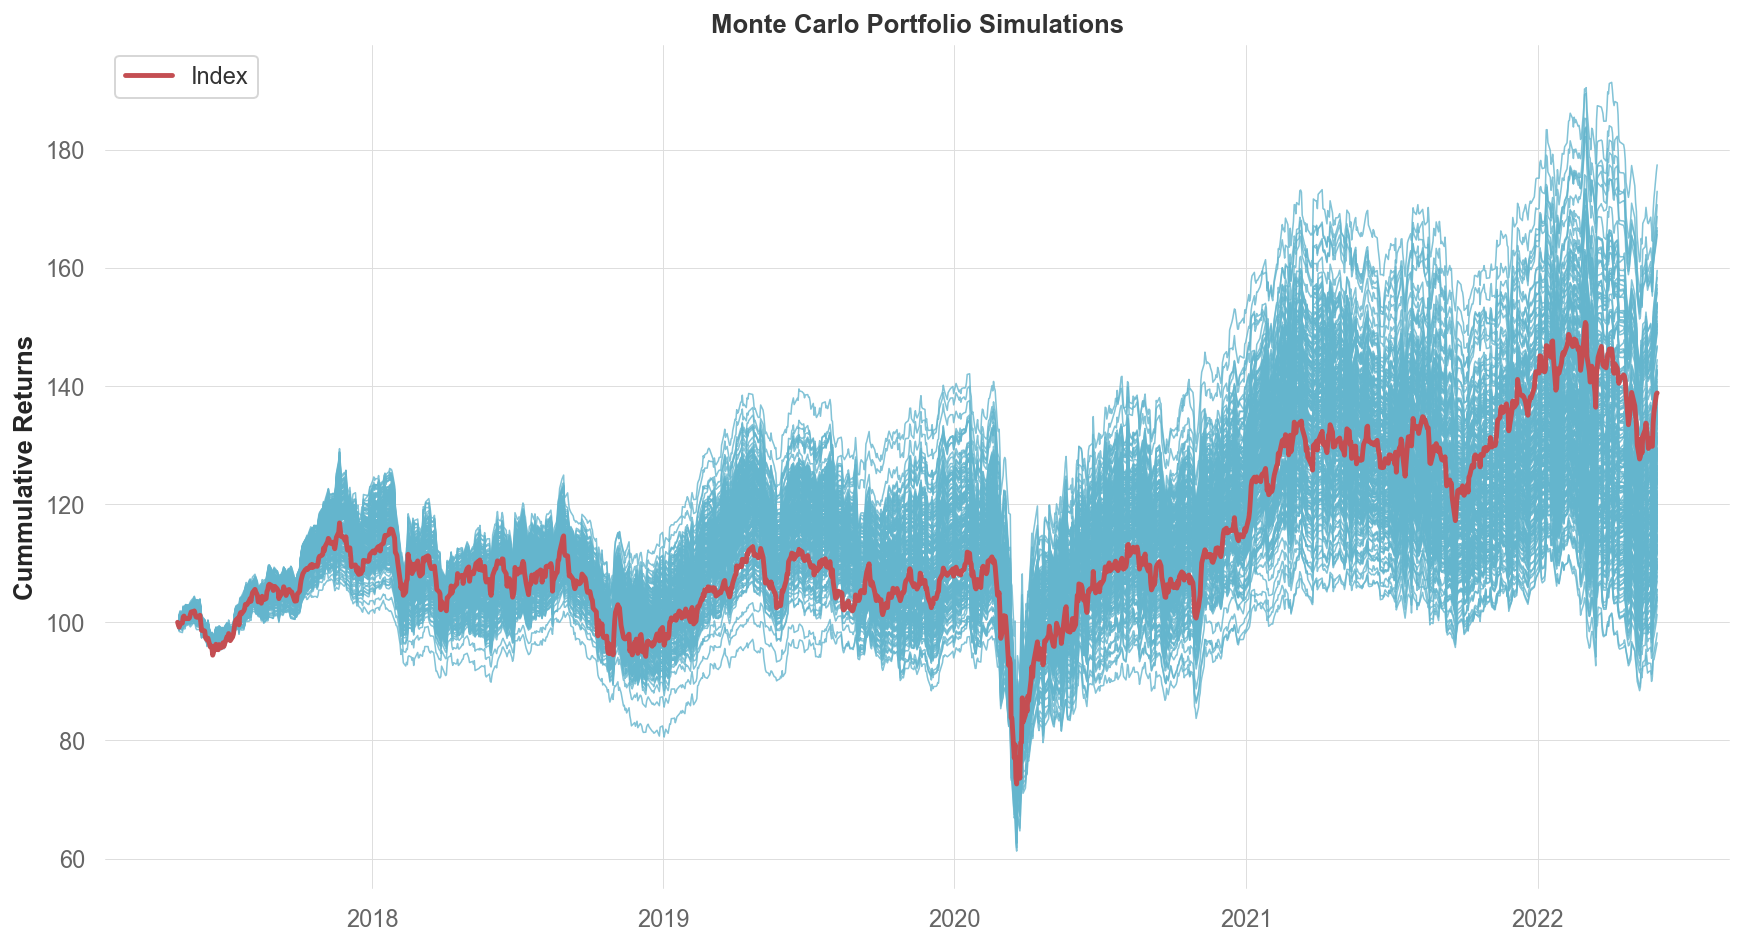

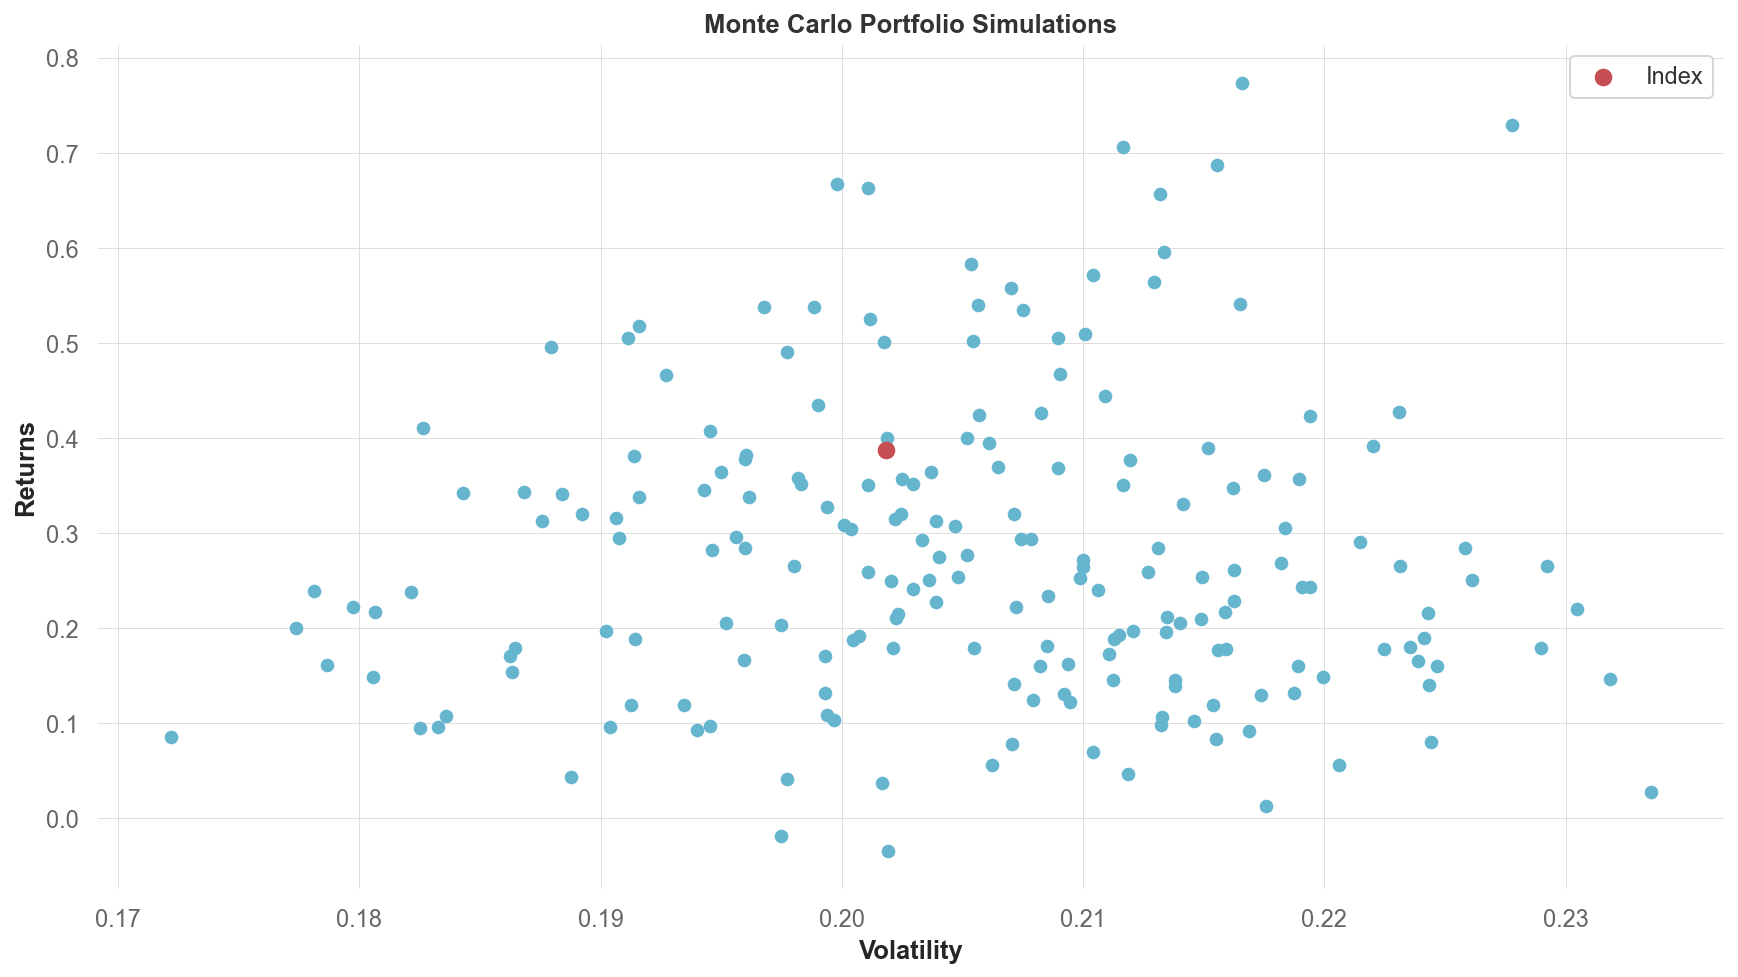

In [21]:
# line plot
plt.figure(figsize=(15, 8))
plt.title('Monte Carlo Portfolio Simulations')
plt.plot(simulated_portfolios.rebase(), c='c', lw=0.8, alpha=0.8)
plt.plot(index.rebase(), label='Index', c='r', lw=2.5)
plt.ylabel('Cummulative Returns'), plt.legend()

# scatter plot
portfols_returns = portfols_metrics['Cumulative Returns']
portfols_vols = portfols_metrics['Volatility']

index_returns = index_metrics['Cumulative Returns']
index_vols = index_metrics['Volatility']

plt.figure(figsize=(15, 8))
plt.title('Monte Carlo Portfolio Simulations')
plt.scatter(portfols_vols, portfols_returns, c='c')
plt.scatter(index_vols, index_returns, c='r', s=65, label='Index')
plt.ylabel('Returns'), plt.xlabel('Volatility'), plt.legend();

In [22]:
metrics = ['Expected Returns','Volatility','Sharpe'] 

In [23]:
count = []

for x in metrics:
    count.append(len(portfols_metrics[portfols_metrics[x] > index_metrics[x].values[0]]))    

normalise_count = np.array(count) / len(portfols_metrics) * 100    

for x in range(len(normalise_count)):
    print(f'{normalise_count[x]}% of Simulated Portfolios have higher {metrics[x]} than the Index.')
print('\n')

20.5% of Simulated Portfolios have higher Expected Returns than the Index.
63.5% of Simulated Portfolios have higher Volatility than the Index.
23.5% of Simulated Portfolios have higher Sharpe than the Index.




In [24]:
portfols_metrics[metrics].describe().T

,count,mean,std,min,25%,50%,75%,max
Expected Returns,200.0,0.040531,0.020854,-0.005866,0.025721,0.038358,0.052474,0.100261
Volatility,200.0,0.205474,0.012285,0.172189,0.197662,0.206141,0.214036,0.233519
Sharpe,200.0,0.329056,0.113070,0.066093,0.248636,0.316830,0.399451,0.615824


Okay, it is highly improbable to beat the market at random. 

Only about 20% of the simulated portfolios outperformed the index and about 63% of the simulated portfolios are more volatile than the index.

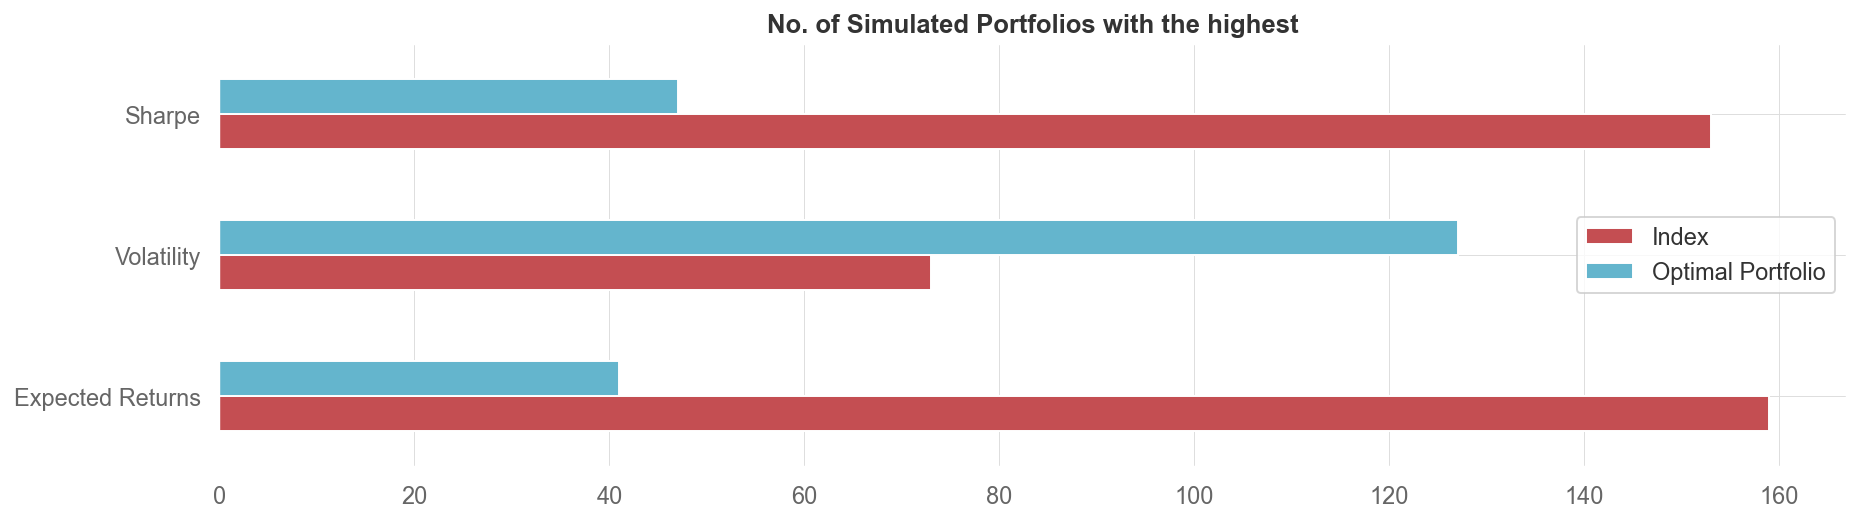

In [25]:
# bar chart
port_count = np.array(count)
indx_count = len(portfols_metrics) - port_count 
counts = pd.DataFrame([indx_count, port_count], columns=metrics, index=['Index','Optimal Portfolio'])
counts.T.plot.barh(figsize=(15, 4), color=['r','c'], title='No. of Simulated Portfolios with the highest');

### Portfolio Selection

In [26]:
display(portfols_metrics.nlargest(5, metrics))
display(index_metrics)

,Expected Returns,Cumulative Returns,Volatility,Sharpe,Sortino,Max Drawdown,VaR at 95%
Portfolio 124,0.100261,0.774084,0.216595,0.615824,0.868399,-0.417305,0.000186
Portfolio 191,0.095586,0.729330,0.227793,0.590361,0.825240,-0.449823,0.000206
Portfolio 179,0.093178,0.706652,0.211667,0.595660,0.834405,-0.425797,0.000178
Portfolio 30,0.091058,0.686887,0.215545,0.583389,0.817921,-0.441746,0.000185
Portfolio 149,0.088984,0.667738,0.199781,0.582882,0.819029,-0.403820,0.000159


,Expected Returns,Cumulative Returns,Volatility,Sharpe,Sortino,Max Drawdown,VaR at 95%
INDEX,0.056171,0.388052,0.201823,0.40129,0.562168,-0.378206,0.000162


The first table above shows the top five portfolios ranked by the largest `Expected Returns, Sharpe Ratio and Cumulative Returns` and they outperformed the index with the first one having Expected Returns of 10.0261% which is about 5% more than compared to the index. However, these portfolios have  slightly more volatility than the index. 

The Sharpe’s Ratio can be thought of as a “reward-to-risk” ratio. It is the ratio of the reward quantified by the excess expected return to the risk as measured by the standard deviation. Thus, we will choose the portfolio with the highest Sharpe Ratio.

In [27]:
max_sharpe_portfol = simulated_portfolios[[portfols_metrics['Sharpe'].idxmax()]]
max_sharpe_weights = simulated_weights.iloc[[portfols_metrics['Sharpe'].argmax()]]

In [28]:
opt_portfol = max_sharpe_portfol.columns[0]
print(f'Optimal Portfolio no: {opt_portfol}\n')

Optimal Portfolio no: Portfolio 124



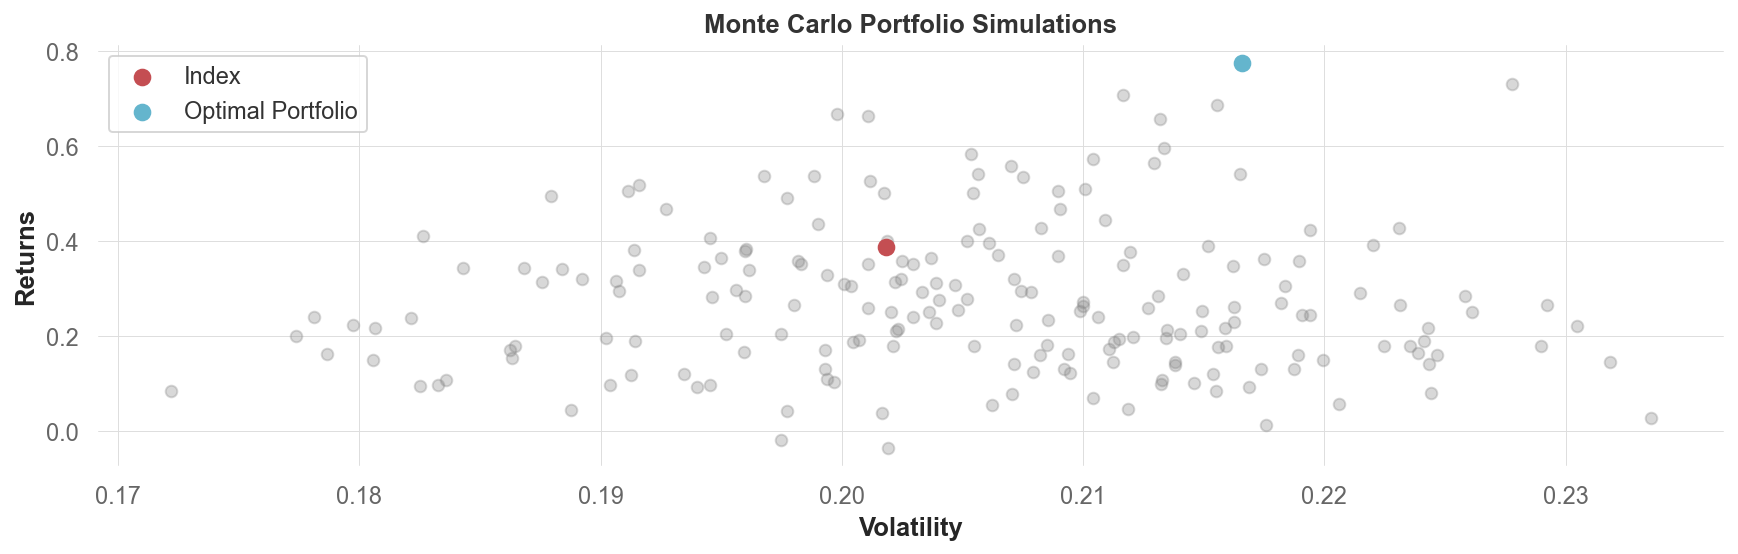

In [29]:
# scatter plot
plt.figure(figsize=(15, 4))
plt.title('Monte Carlo Portfolio Simulations')
plt.scatter(portfols_vols, portfols_returns, c='gray', alpha=0.3)
plt.scatter(index_vols, index_returns, c='r', s=65, label='Index')
plt.scatter(portfols_vols[opt_portfol], portfols_returns[opt_portfol], 
            c='c', s=65, label='Optimal Portfolio'), 
plt.ylabel('Returns'), plt.xlabel('Volatility'), plt.legend();

As seen on the scatter plot above, the Optimal Portfolio is almost 2% more volatilte than the Index, and it offers almost 2x Index returns.

### **Visualisation**

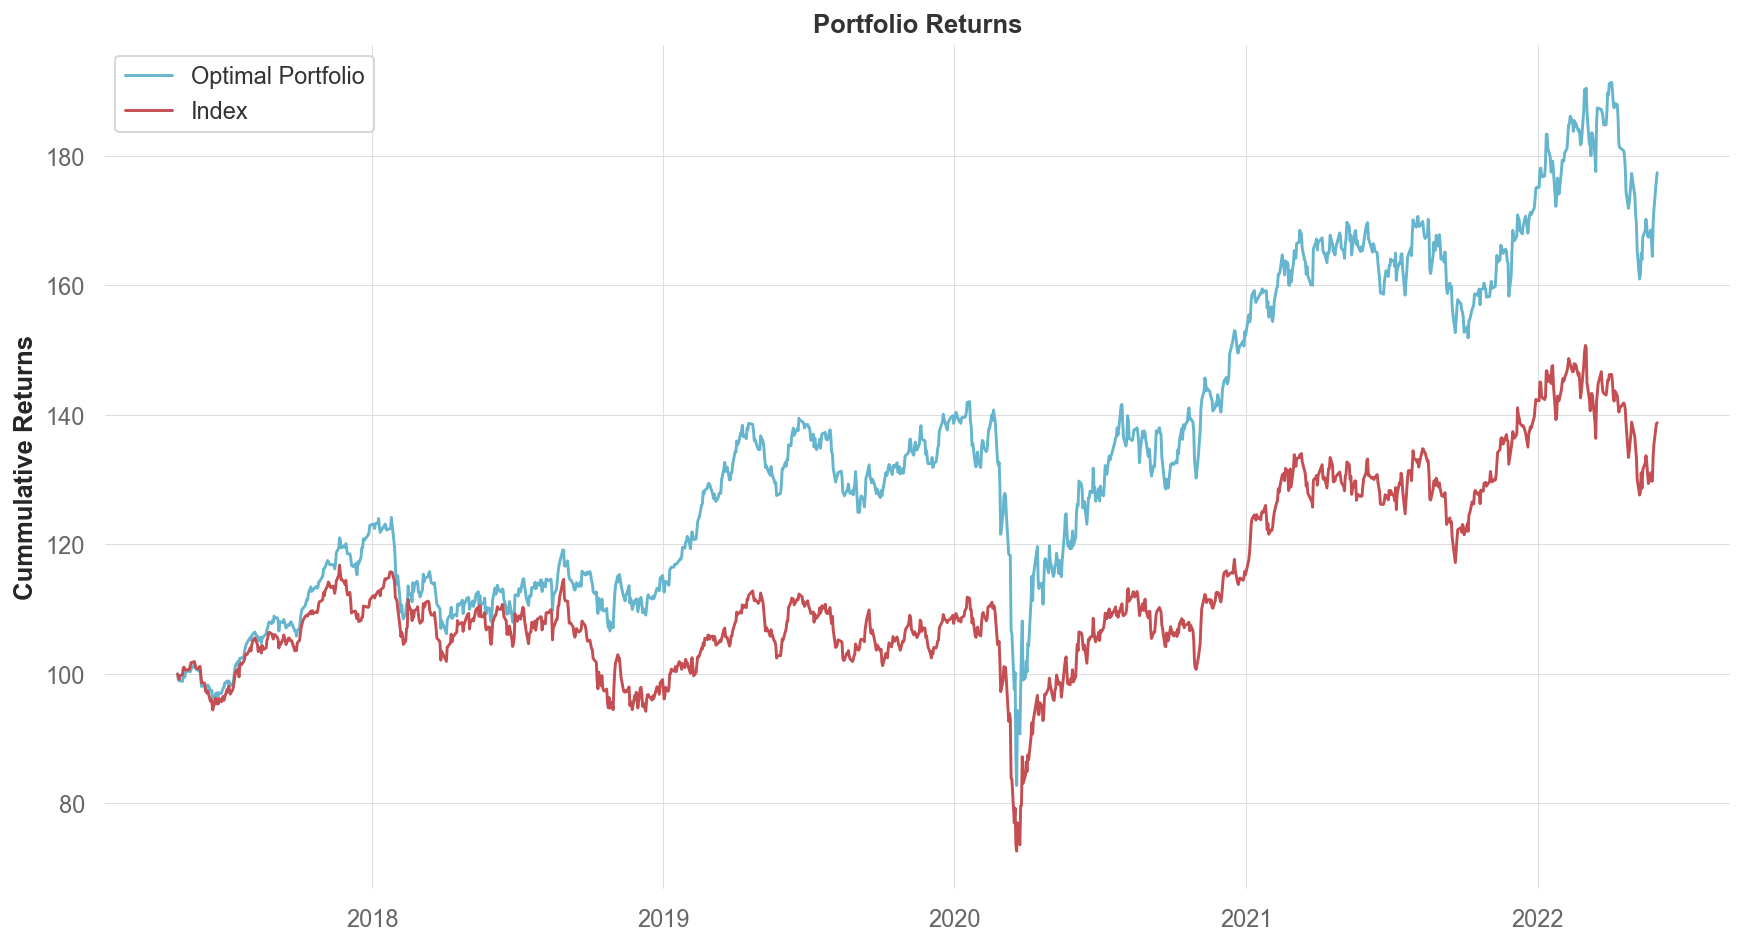

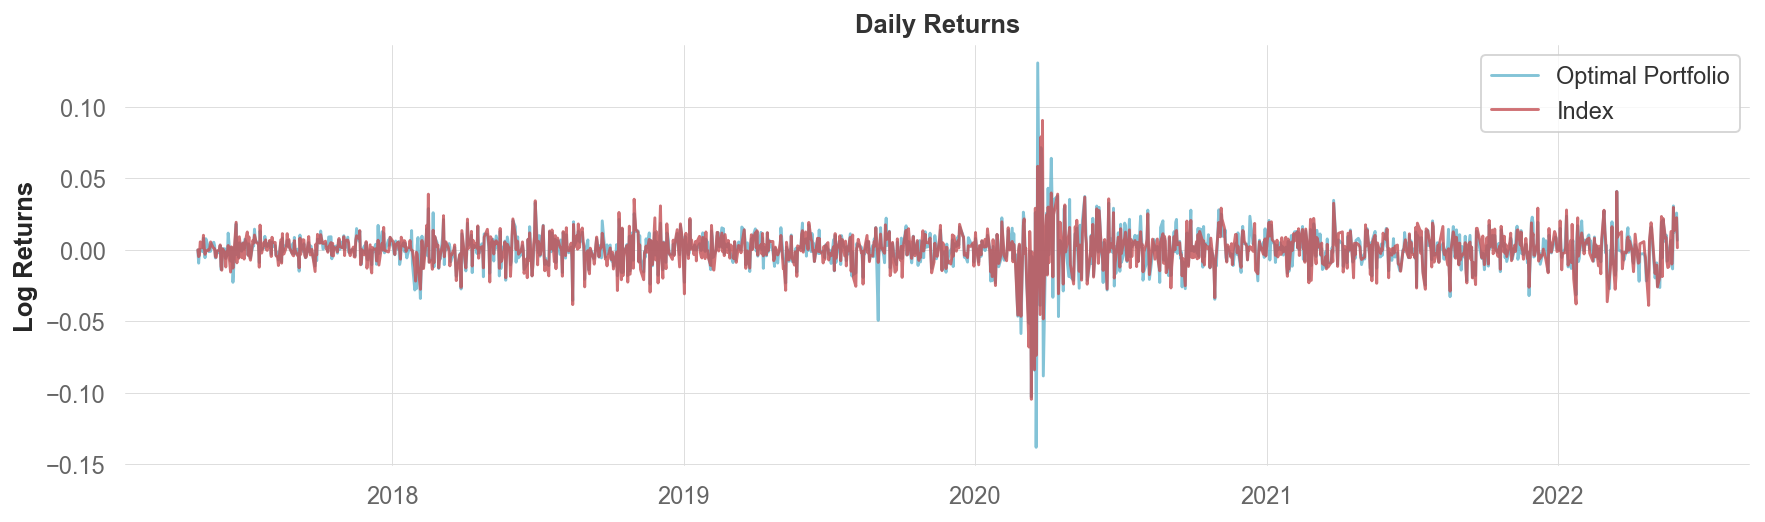

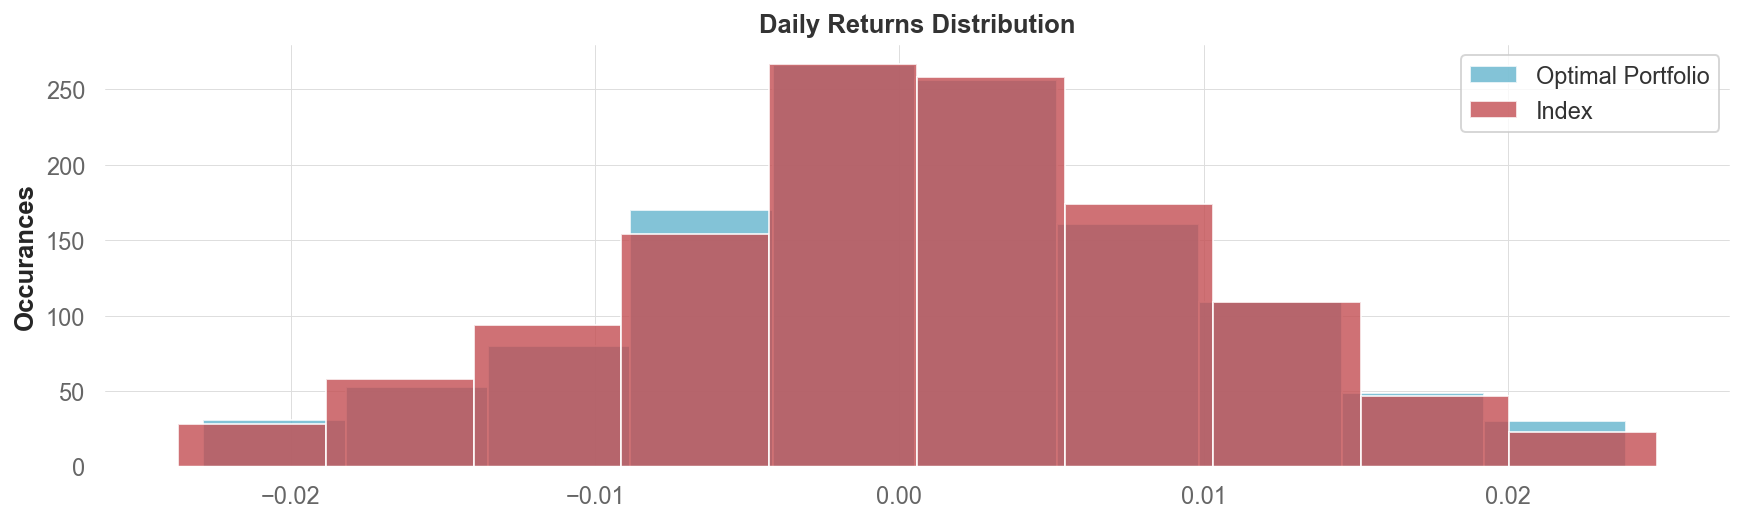

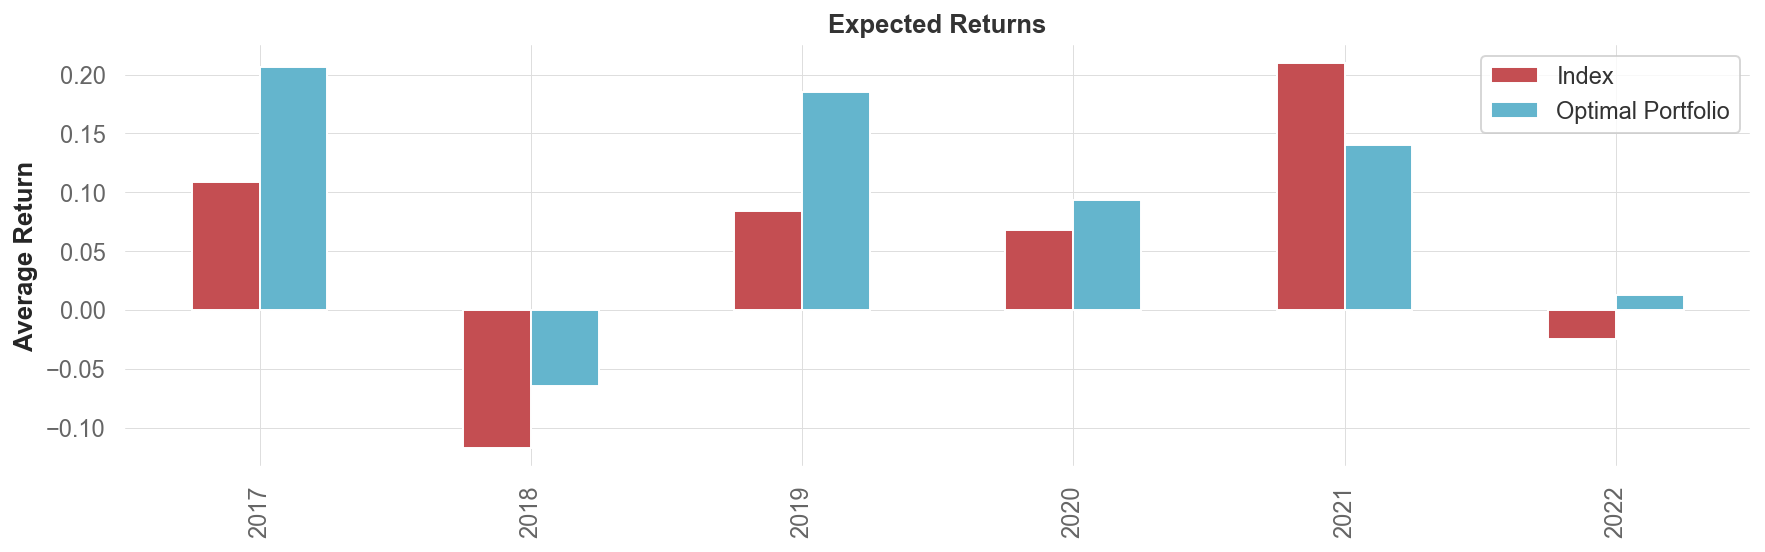

In [30]:
# line plot
plt.figure(figsize=(15, 8))
plt.title('Portfolio Returns')
plt.plot(max_sharpe_portfol.rebase(), c='c', label='Optimal Portfolio')
plt.plot(index.rebase(), c='r', label='Index')
plt.ylabel('Cummulative Returns'), plt.legend();

# returns plot
plt.figure(figsize=(15, 4))
plt.title('Daily Returns')
plt.plot(max_sharpe_portfol.log_returns(), c='c', alpha=0.8, 
         label='Optimal Portfolio')
plt.plot(index.log_returns(), c='r', alpha=0.8, label='Index')
plt.ylabel('Log Returns'), plt.legend()

# histogram 
plt.figure(figsize=(15, 4))
plt.title('Daily Returns Distribution')
plt.hist(stats.distribution(max_sharpe_portfol)['Daily']['values'],
         color='c', alpha=0.8, label='Optimal Portfolio')
plt.hist(stats.distribution(index)['Daily']['values'], color='r', 
         alpha=0.8, label='Index'), plt.ylabel('Occurances'), plt.legend()

# bar plot
opt_portfol_yoy = utils.group_returns(index.log_returns(), index.index.year)
index_yoy = utils.group_returns(max_sharpe_portfol.log_returns(), index.index.year)
yoy_r = pd.concat([opt_portfol_yoy, index_yoy], axis=1)

yoy_r.plot.bar(color=['r','c'], title='Expected Returns', figsize=(15, 4))
plt.title('Expected Returns'), plt.ylabel('Average Return')
plt.xlabel(''), plt.legend(['Index','Optimal Portfolio']);

### Asset allocations

In [31]:
sort_weights = max_sharpe_weights.T.sort_values(by=max_sharpe_weights.index[0], ascending=False)
(sort_weights * 100).round(2).astype('<U11') + '%'

,124
SSWJ,5.23%
CPIJ,5.18%
OMUJ,5.14%
KIOJ,5.05%
GFIJ,5.01%
DSYJ,4.97%
ANGJ,4.83%
MTNJ,4.47%
INPJ,4.37%
NRPJ,3.81%


**Top 10 FTSE/JSE Top 40 Index Constituents as at 31 May 2022 include:** 

Compagnie Financiere Richemont AG, BHP Group Plc, Anglo American, Naspers, Prosus, MTN Group, Firstrand Limited, Mondi Plc, Impala Platinum Holdings and Standard Bank Group.

Let's look at the 10 top and bottom portfolio allocations suggested by the simulations.

In [32]:
display(stocks_metrics.loc[sort_weights.iloc[:10].index][metrics].T)
display(stocks_metrics.loc[sort_weights.iloc[-10:].index][metrics].T)

,SSWJ,CPIJ,OMUJ,KIOJ,GFIJ,DSYJ,ANGJ,MTNJ,INPJ,NRPJ
Expected Returns,0.209862,0.194548,-0.053881,0.228183,0.235168,0.014062,0.104353,0.048839,-0.005102,-0.093849
Volatility,0.601684,0.403604,0.475807,0.484720,0.540348,0.370699,0.502399,0.456148,0.389252,0.379866
Sharpe,0.655427,0.695467,0.070688,0.704008,0.731607,0.226821,0.481194,0.340537,0.173887,-0.105901


,BIDJ,SOLJ,NPNJn,REMJ,S32J,ANHJ,BVTJ,PPHJ,APNJ,BTIJ
Expected Returns,0.025608,-0.000489,-0.059624,-0.062338,0.126985,-0.086114,0.047862,0.000000,-0.087225,-0.043708
Volatility,0.308473,0.685654,0.414404,0.289678,0.409351,0.320414,0.326947,0.386776,0.413526,0.280382
Sharpe,0.247887,0.303864,0.035921,-0.115030,0.467147,-0.166244,0.328024,0.181709,-0.050170,-0.047865


**The model is not perfect...**

For instance, asset allcations for `OMUJ` and `S23J` are not ideal. I believe if we were to rank our allocations using the Sharpe Ratio we would maximise our returns even furthure. However, the suppose of this notebook was to find the optimal portfolio at random.

# _____

# Conclusion
**This was FUN!** 

We were able to get optimal portfolio allocations for FTSE/JSE Top 40 Portfolio at random thanks to Monte Carlo Simulations and Modern Portfolio Theory, moreover, the portfolio outperformed the benchmark 4 of 5 times which I think is really COOL.

# About Me
http://www.linkedin.com/in/thabangndhlovu

# Disclaimer
This notebook is entirely for educational purposes. None of the information in this notebook constitutes a recommendation that any particular portfolio of securities is suitable for any particular person. All trading strategies are used at your own risk.